[  6.37734541 -10.61510727] [ 6.50072722 -3.82403586]


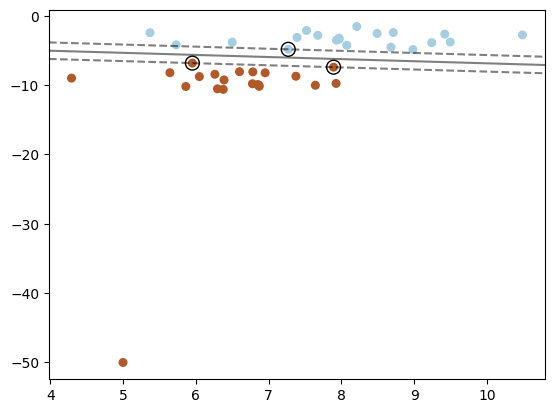

<Figure size 640x480 with 0 Axes>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs


X, y = make_blobs(n_samples=40, centers=2, random_state=6)
print(X[0], X[1])
# ここだけ追加、全体から離れた場所に新しい点を追加
X = np.insert(X,0,[5,-50],axis=0)
y = np.insert(y,0,1)

clf = svm.SVC(kernel='linear', C=1000)
clf.fit(X, y)
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T

Z = clf.decision_function(xy).reshape(XX.shape)

ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.show()
plt.clf()

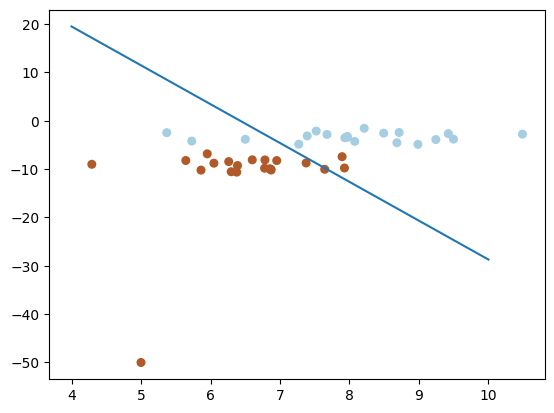

<Figure size 640x480 with 0 Axes>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.datasets import make_blobs

# ignore warning message
import warnings
warnings.filterwarnings('ignore')

X, y = make_blobs(n_samples=40, centers=2, random_state=6)
# ここだけ追加、全体から離れた場所に新しい点を追加
X = np.insert(X,0,[5,-50],axis=0)
y = np.insert(y,0,1)


y = y*2-1
clf = linear_model.LinearRegression(fit_intercept=True,normalize=True,copy_X=True)
clf.fit(X, y)
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

x_plot = np.linspace(4,10,100)
w = [clf.intercept_,clf.coef_[0],clf.coef_[1]]
y_plot = -(w[1]/w[2]) * x_plot - w[0]/w[2] # 下方で説明
plt.plot(x_plot,y_plot)
plt.show()
plt.clf()

ヒンジ損失は性質上、正しく分類されていれば損失値への影響はありませんが、

一方二乗損失の方は境界線の距離に応じて損失値が変わってきます。

そのため、上記のように大きな外れ値があった場合にヒンジ損失では何の問題も無く分類で来ているが、二乗損失では正解であっても遠く離れたものは大きなペナルティを与えてしまうため、境界線の場所がおかしくなってしまいます。